In [1]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# BigFrames AI Forecast

<table align="left">

  <td>
    <a href="https://colab.research.google.com/github/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Colab logo"> Run in Colab
    </a>
  </td>
  <td>
    <a href="https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo">
      View on GitHub
    </a>
  </td>
  <td>
    <a href="https://console.cloud.google.com/bigquery/import?url=https://github.com/googleapis/python-bigquery-dataframes/blob/main/notebooks/generative_ai/bq_dataframes_ai_forecast.ipynb">
      <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTW1gvOovVlbZAIZylUtf5Iu8-693qS1w5NJw&s" alt="BQ logo" width="35">
      Open in BQ Studio
    </a>
  </td>
</table>


This Notebook introduces forecasting with GenAI Fundation Model with BigFrames AI.

### Setup

In [2]:
PROJECT = "bigframes-dev" # replace with your project

import bigframes
# Setup project
bigframes.options.bigquery.project = PROJECT
bigframes.options.display.progress_bar = None

import bigframes.pandas as bpd

### 1. Create a BigFrames DataFrames from BigQuery public data.

In [3]:
df = bpd.read_gbq("bigquery-public-data.san_francisco_bikeshare.bikeshare_trips")
df

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,1304531,597,2016-08-05 10:55:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,2016-08-05 11:05:00+00:00,Powell Street BART,39,214,95121,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
1,184870,403,2014-02-14 14:50:00+00:00,Howard at 2nd,63,2014-02-14 14:56:00+00:00,Commercial at Montgomery,45,342,94122,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
2,20170702115603836,16695,2017-07-02 11:56:03+00:00,Union Square (Powell St at Post St),324,2017-07-02 16:34:19+00:00,Union Square (Powell St at Post St),324,836,<NA>,...,<NA>,37.7883,-122.408531,37.7883,-122.408531,<NA>,<NA>,<NA>,POINT (-122.40853 37.7883),POINT (-122.40853 37.7883)
3,1066810,953,2016-01-21 08:24:00+00:00,Civic Center BART (7th at Market),72,2016-01-21 08:40:00+00:00,Embarcadero at Sansome,60,212,94103,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
4,220481,679,2014-03-19 19:20:00+00:00,San Francisco Caltrain 2 (330 Townsend),69,2014-03-19 19:31:00+00:00,Civic Center BART (7th at Market),72,478,94107,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
5,738474,358,2015-04-23 16:45:00+00:00,2nd at Folsom,62,2015-04-23 16:51:00+00:00,Steuart at Market,74,443,94105,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
6,229264,286,2014-03-27 17:56:00+00:00,Embarcadero at Sansome,60,2014-03-27 18:01:00+00:00,Davis at Jackson,42,342,94133,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
7,352010,3621,2014-07-06 13:55:00+00:00,Embarcadero at Sansome,60,2014-07-06 14:55:00+00:00,Embarcadero at Sansome,60,390,4038,...,Customer,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
8,156255,416,2014-01-16 18:06:00+00:00,Embarcadero at Bryant,54,2014-01-16 18:13:00+00:00,San Francisco Caltrain (Townsend at 4th),70,510,94107,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None
9,1040197,1054,2015-12-15 18:05:00+00:00,Steuart at Market,74,2015-12-15 18:22:00+00:00,San Francisco Caltrain (Townsend at 4th),70,700,94111,...,Subscriber,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,None,None


### 2. Preprocess Data

Only take the start_date after 2018 and the "Subscriber" category as input. start_date are truncated to each hour.

In [4]:
df = df[df["start_date"] >= "2018-01-01"]
df = df[df["subscriber_type"] == "Subscriber"]
df["trip_hour"] = df["start_date"].dt.floor("h")
df = df[["trip_hour", "trip_id"]]

Group and count each hour's num of trips.

In [5]:
df_grouped = df.groupby("trip_hour").count()
df_grouped = df_grouped.reset_index().rename(columns={"trip_id": "num_trips"})
df_grouped

,trip_hour,num_trips
0,2018-01-01 00:00:00+00:00,20
1,2018-01-01 01:00:00+00:00,25
2,2018-01-01 02:00:00+00:00,13
3,2018-01-01 03:00:00+00:00,11
4,2018-01-01 05:00:00+00:00,4
5,2018-01-01 06:00:00+00:00,8
6,2018-01-01 07:00:00+00:00,8
7,2018-01-01 08:00:00+00:00,20
8,2018-01-01 09:00:00+00:00,30
9,2018-01-01 10:00:00+00:00,41


### 3. Make forecastings for next 1 week with DataFrames.ai.forecast API

In [6]:
result = df_grouped.ai.forecast(timestamp_column="trip_hour", data_column="num_trips", horizon=168) # 1 week
result

,forecast_timestamp,forecast_value,confidence_level,prediction_interval_lower_bound,prediction_interval_upper_bound,ai_forecast_status
0,2018-05-05 01:00:00+00:00,50.123672,0.95,-13.062586,113.309931,
1,2018-05-05 07:00:00+00:00,103.112846,0.95,33.725954,172.499739,
2,2018-05-03 15:00:00+00:00,230.49147,0.95,152.635986,308.346954,
3,2018-05-02 08:00:00+00:00,737.477356,0.95,562.979208,911.975504,
4,2018-05-01 08:00:00+00:00,679.980469,0.95,479.980134,879.980803,
5,2018-05-06 18:00:00+00:00,136.80835,0.95,-13.813863,287.430562,
6,2018-05-01 11:00:00+00:00,120.364288,0.95,52.778249,187.950328,
7,2018-05-06 22:00:00+00:00,64.722443,0.95,-55.555842,185.000727,
8,2018-05-03 02:00:00+00:00,42.689804,0.95,33.258414,52.121194,
9,2018-05-07 17:00:00+00:00,594.999084,0.95,346.917217,843.080952,


### 4. Process the raw result and draw a line plot along with the training data

In [7]:
result = result.sort_values("forecast_timestamp")
result = result[["forecast_timestamp", "forecast_value"]]
result = result.rename(columns={"forecast_timestamp": "trip_hour", "forecast_value": "num_trips_forecast"})
df_all = bpd.concat([df_grouped, result])
df_all = df_all.tail(672) # 4 weeks

<Axes: xlabel='trip_hour'>

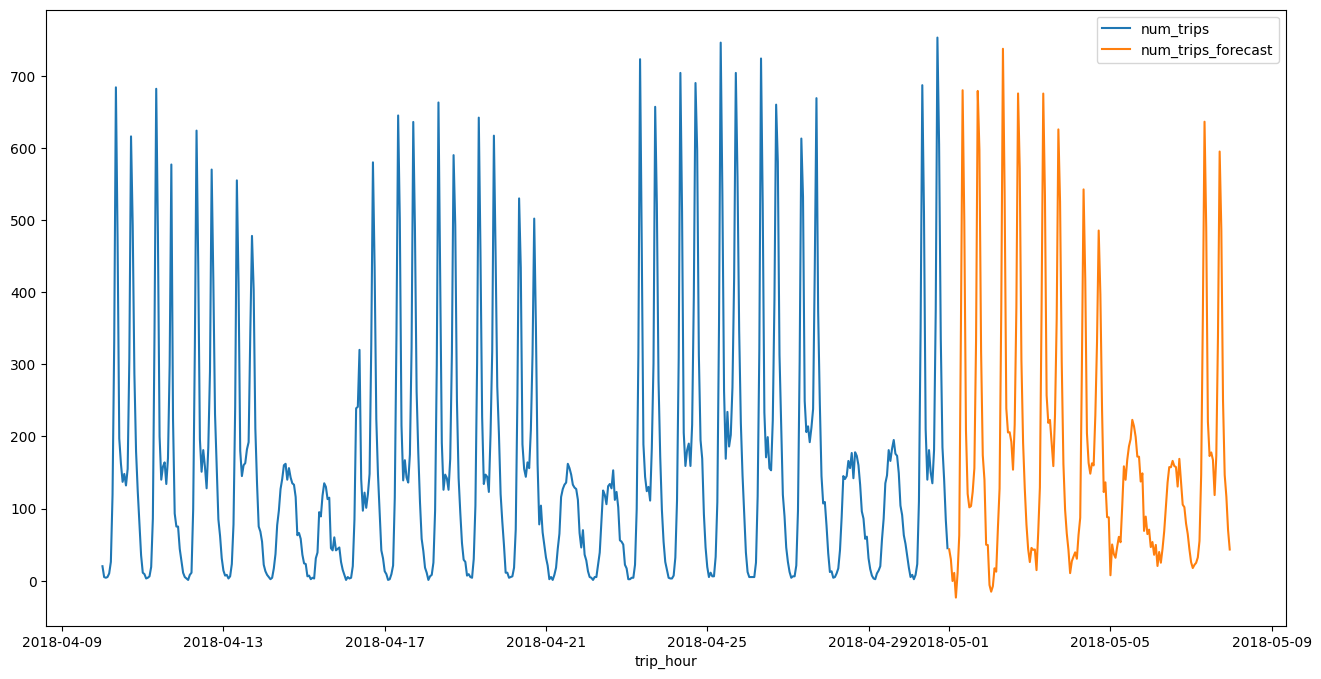

In [8]:
df_all = df_all.set_index("trip_hour")
df_all.plot.line(figsize=(16, 8))